## Load Dataset

In [108]:
# Load required packages
suppressPackageStartupMessages(library(tidyverse))
install.packages("ggrepel")
# Load dataset
covid19 <- read_csv("covid19_daily.csv")





package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeSlVbO\downloaded_packages


Parsed with column specification:
cols(
  country = col_character(),
  observation_date = col_date(format = ""),
  days_in_country = col_double(),
  cases = col_double(),
  deaths = col_double(),
  recovered = col_double()
)


# Quesiton 1

### Pt. 1: What country has the most cases of COVID-19?

In [70]:
# New DF with total amount of cases, died, and recovered as of 3/1/2020
covid19_countries<- covid19 %>%
  select(country:recovered) %>%
    select(-days_in_country) %>%
  filter(observation_date == "2020-03-01")

head(covid19_countries)

country,observation_date,cases,deaths,recovered
Afghanistan,2020-03-01,1,0,0
Algeria,2020-03-01,1,0,0
Armenia,2020-03-01,1,0,0
Australia,2020-03-01,27,1,11
Austria,2020-03-01,14,0,0
Azerbaijan,2020-03-01,3,0,0


In [53]:
covid19_countries[covid19_countries$cases == max(covid19_countries$cases),]

# Mainland China has the most cases

country,observation_date,cases,deaths,recovered
Mainland China,2020-03-01,79826,2870,42118


### Pt. 2: Sort the new dataframe by the total number of cases in each country and print the top 6 highest count of cases

In [93]:
covid19_countries %>%
    arrange(desc(cases)) %>%
    head()

country,observation_date,cases,deaths,recovered
Mainland China,2020-03-01,79826,2870,42118
South Korea,2020-03-01,3736,17,30
Italy,2020-03-01,1694,34,83
Iran,2020-03-01,978,54,175
Others,2020-03-01,705,6,10
Japan,2020-03-01,256,6,32


# Question 2 

 ### Calculate the total number of people that have been infected, died and recovered 

In [56]:
covid19_countries %>%
  summarize(
    total_cases = sum(cases),
    total_deaths = sum(deaths),
    total_recovered = sum(recovered)
  )

total_cases,total_deaths,total_recovered
88373,2996,42716


# Question 3

### Pt. 1: Create a new dataframe that aggregates all the individual rows into global daily totals

In [86]:
covid19_daily<- covid19 %>%
  group_by(observation_date) %>%
  summarize(
    daily_cases = sum(cases),
    daily_deaths = sum(deaths),
    daily_recovered = sum(recovered)
  )

head(covid19_daily)

observation_date,daily_cases,daily_deaths,daily_recovered
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1438,42,39
2020-01-26,2118,56,52
2020-01-27,2927,82,61


### Pt. 2: Plot a single graph showing the number of global cases, deaths, and recovered 

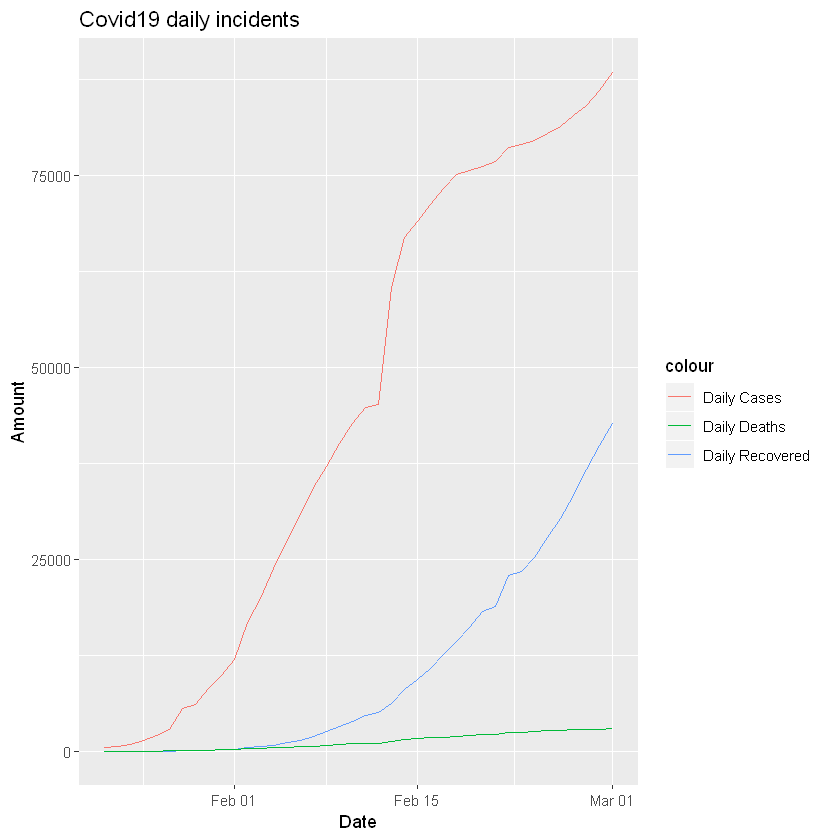

In [89]:
covid19_daily%>%
  ggplot() +
  labs(title = "Covid19 daily incidents", x = "Date", y = "Amount") +
  geom_line(mapping = aes( x = observation_date,
                           y = daily_cases, color = 'Daily Cases')) +
  geom_line(mapping = aes( x = observation_date,
                           y = daily_recovered, color = 'Daily Recovered')) +
  geom_line(mapping = aes( x = observation_date,
                           y = daily_deaths, color = 'Daily Deaths'))

# Question 4

### Create 2 new columns into covid19_daily DF to calculate mortality rate and recovery rate 

In [90]:
covid19_daily_2 <- covid19_daily %>%
  mutate(mortality_rate = daily_deaths / daily_cases, 
         recovery_rate = daily_recovered / daily_cases)

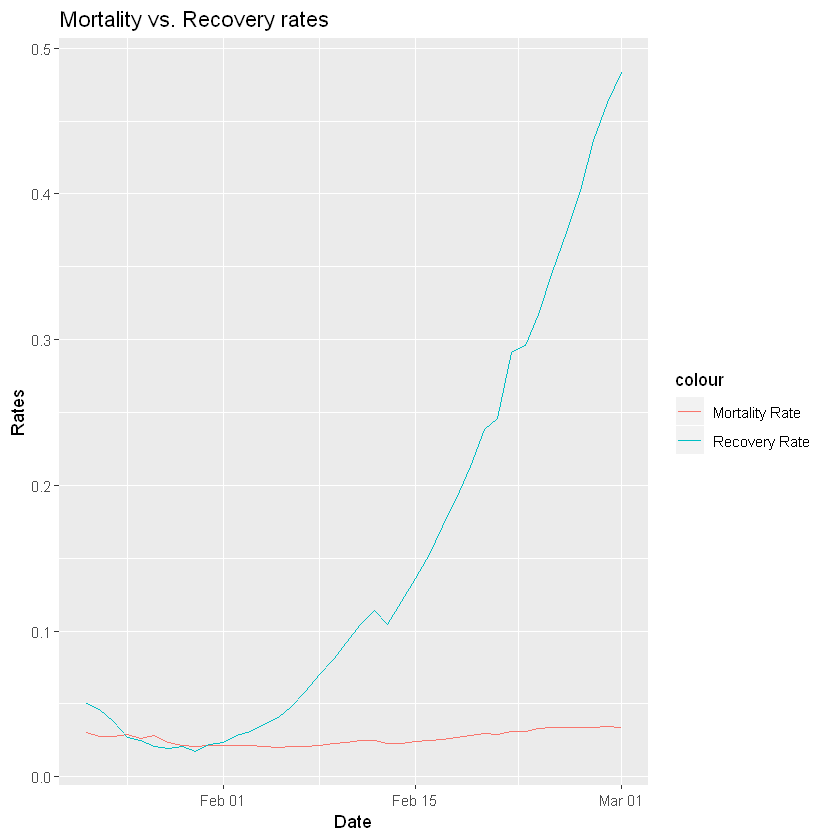

In [91]:
covid19_daily_2 %>%
 ggplot() +
  labs(title = "Mortality vs. Recovery rates", x = "Date", y = "Rates") +
  geom_line(mapping = aes( x = observation_date,
                           y = mortality_rate, color = 'Mortality Rate')) +
  geom_line(mapping = aes( x = observation_date,
                           y = recovery_rate, color = 'Recovery Rate'))

# Qurestion 5

### The Center for Disease Control (CDC) currently estimates that in the US 2019-2020 flu season there have been somewhere between 32-45 million cases of the flu in the USA, resulting in somewhere between 18,000-46,000 deaths.

## Calculate the minimum and maximum mortality rates for the flu in the USA from these numbers

In [98]:
# Min Flu mortality rate 

18000/45000000

[1] 4e-04

In [99]:
# Max Flu mortality rate

46000/32000000

[1] 0.0014375

## How does this mortality rate range for the flu compare to the mortality rate for COVID-19 that you see on your graph in Q4?

### Compared to Covid19, which has a mortality rate around .025, the flu has a much lower rate of mortality

# Question 6

## Since the virus originated in China, create a China only dataframe to plot a line graph showing the rise in cases

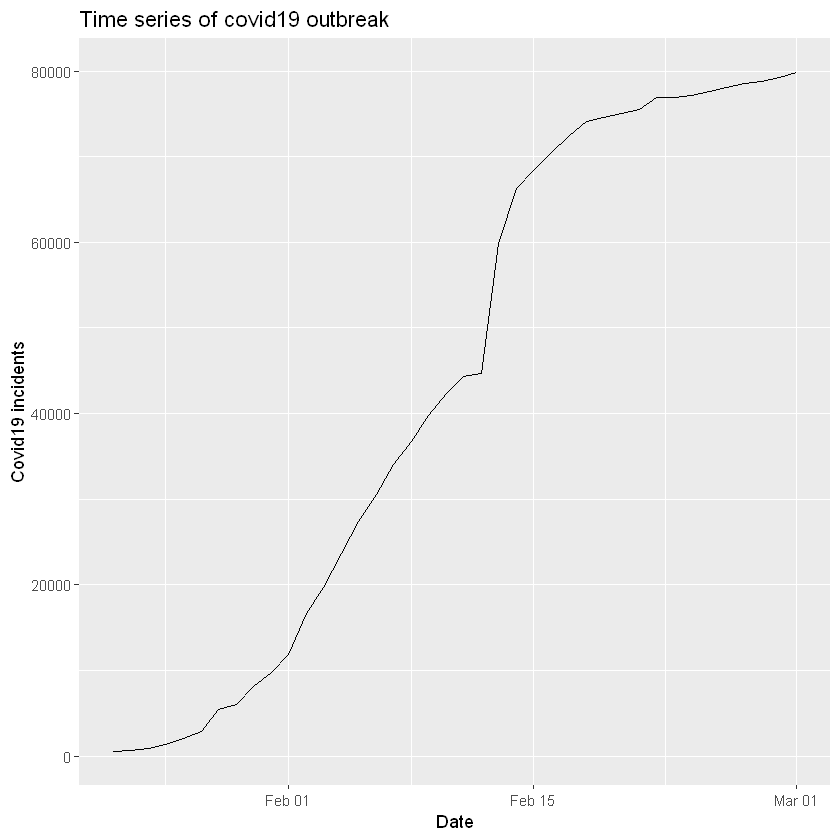

In [101]:
covid19 %>%
  filter(country == "Mainland China") %>%
 ggplot() +
    geom_line(mapping = aes(x = observation_date, y = cases)) +
    labs(title = "Time series of covid19 outbreak",
         x = "Date", y = "Covid19 incidents")

# Question 7

## Omit the count of cases from China and "Others"

In [104]:
covid19_new <- covid19 %>%
  filter(country != "Mainland China" & country != "Others")

## Using this new dataframe, create a line graph that shows the growth in the number of cases in each of the remaing countries

In [105]:
country_labels <- covid19_new %>%
  group_by(country) %>%
  filter(
    row_number(desc(observation_date)) == 1, 
    cases > 125 | (cases > 30 & days_in_country < 10)
  )

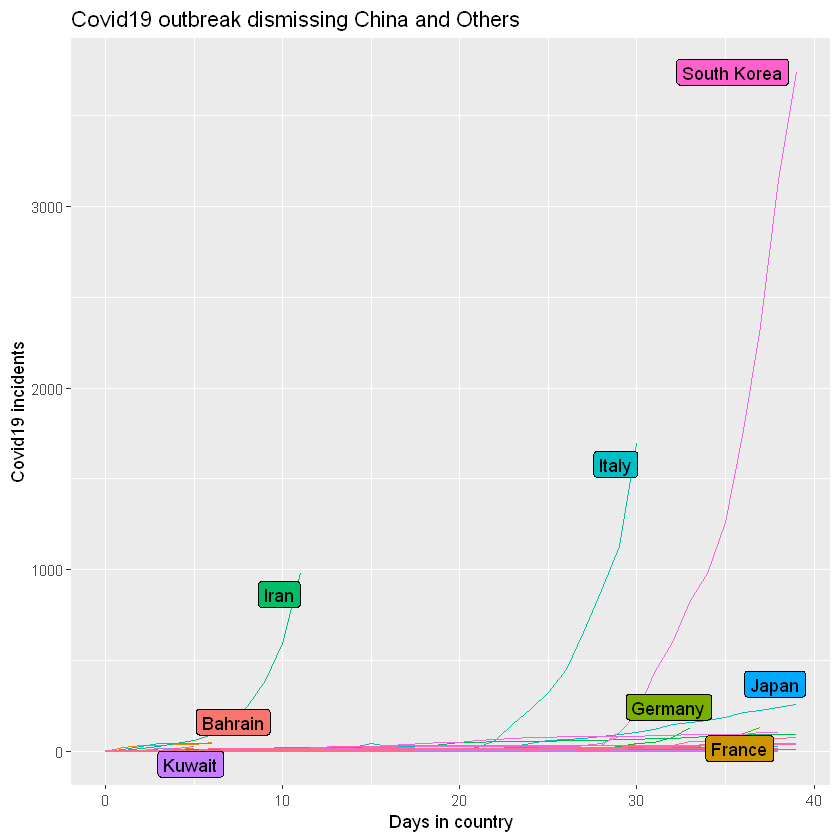

In [109]:
covid19_new %>%
 ggplot() +
    geom_line(mapping = aes(x = days_in_country, 
                            y = cases, color = country), show.legend = FALSE) +
    labs(title = "Covid19 outbreak dismissing China and Others",
         x = "Days in country", y = "Covid19 incidents", 
         color = "Country")+
  theme(legend.position = "bottom") +
  ggrepel::geom_label_repel(
    mapping = aes(x = days_in_country, y = cases, fill = country, label = country), 
    data = country_labels, 
    show.legend = FALSE
  ) 

# Question 8

## Would a linear model be appropriate for modeling the number of cases, deaths, and recoveries of the virus?

### No, a linear model would not be appropriate since the data is non-linear